<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220919.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* customer analysis
* iterator

In [1]:
import pandas as pd 
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes 
from datetime import datetime, date, time, timezone, timedelta 
import os
import re
from functools import reduce 
from collections import defaultdict, ChainMap, Counter

# customer analysis

In [2]:
os.listdir()

['.config',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'online_retail_II.xlsx',
 'test.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'ecommerce-data.csv',
 'sample_data']

In [3]:
df = pd. read_csv('ecommerce-data.csv', encoding = 'unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.columns = ['_'.join(re.split(r'(?=[A-Z][a-z])', a[0].lower() + a[1:])).lower().replace(' ', '_') for a in df.columns]
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [9]:
df = df[(~df.invoice_no.astype(str).str.contains('C')) & (df.country == 'United Kingdom')]
df.invoice_date = pd.to_datetime(df.invoice_date)
df['date'] = df.invoice_date.to_numpy().astype('datetime64[D]')
df['month'] = df.invoice_date.to_numpy().astype('datetime64[M]')
df['week'] = df['date'] - df['date'].dt.weekday.astype('timedelta64[D]')
df['rev'] = df.quantity * df.unit_price
df['description'] = [str(a).strip() for a in df['description']]
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customerid,country,date,month,week,rev
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,2010-11-29,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,2010-11-29,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,2010-11-29,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,2010-11-29,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,2010-11-29,20.34


In [14]:
df = df.assign(desc = df['description'].str.extract(r'.+\s(.+)$'))
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customerid,country,date,month,week,rev,desc
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,2010-11-29,15.30,HOLDER
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,2010-11-29,20.34,LANTERN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,2010-11-29,22.00,HANGER
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,2010-11-29,20.34,BOTTLE
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,2010-11-29,20.34,HEART.


In [22]:
cnt = df.rename(columns = {'customerid':'id'}).groupby(['id','date','week','month','desc']).agg({'country':'count', 'rev':'sum'}).reset_index()
cnt.columns = ['cnt' if a == 'country' else a for a in cnt.columns]
cnt.head()

,id,date,week,month,desc,cnt,rev
0,12346.0,2011-01-18,2011-01-17,2011-01-01,JAR,1,77183.60
1,12747.0,2010-12-05,2010-11-29,2010-12-01,ASSORTED,1,13.52
2,12747.0,2010-12-05,2010-11-29,2010-12-01,FINISH,1,199.80
3,12747.0,2010-12-05,2010-11-29,2010-12-01,FRAME,2,45.90
4,12747.0,2010-12-05,2010-11-29,2010-12-01,HLDR,1,39.60


In [30]:
cnt2 = cnt.groupby(['desc']).agg({'cnt':'sum', 'rev':'sum'}).reset_index()
cnt2 = cnt2.assign(ratio = cnt2['rev'].apply(lambda x : round(x/cnt2['rev'].sum() * 100, 2))).sort_values(['rev', 'ratio'], ascending = [0,0])
cnt2

,desc,cnt,rev,ratio
403,HOLDER,9932,317971.640,4.37
265,DESIGN,18100,309917.700,4.26
640,RETROSPOT,8317,223593.660,3.07
699,SIGN,9019,182525.460,2.51
136,BUNTING,4603,171356.170,2.36
...,...,...,...,...
701,SISTERS.,1,2.280,0.00
433,KEY-CHAINS,2,1.680,0.00
788,TEDDY/CAKE,1,0.950,0.00
637,REEL,1,0.840,0.00


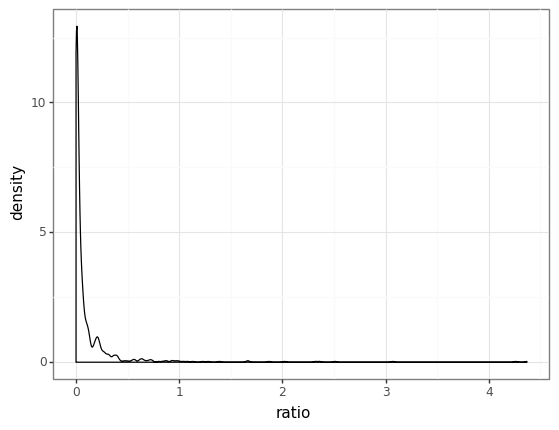

<ggplot: (8760926839029)>

In [31]:
(
    ggplot(cnt2, aes('ratio')) +
    gg.geom_density() +
    gg.theme_bw()
)

In [35]:
cnt2['desc2'] = np.where(cnt2['ratio'] >= 0.5, cnt2['desc'], 'etc')
cnt2.head()

,desc,cnt,rev,ratio,desc2
403,HOLDER,9932,317971.64,4.37,HOLDER
265,DESIGN,18100,309917.70,4.26,DESIGN
640,RETROSPOT,8317,223593.66,3.07,RETROSPOT
699,SIGN,9019,182525.46,2.51,SIGN
136,BUNTING,4603,171356.17,2.36,BUNTING


In [36]:
cnt3 = cnt2.groupby(['desc2']).agg({'cnt':'sum', 'rev':'sum'}).reset_index()
cnt3.head()

,desc2,cnt,rev
0,BAG,5410,72867.41
1,BIRDIE,1,168469.60
2,BLUE,2581,41387.34
3,BOTTLE,5105,120772.94
4,BOWL,3068,40531.05


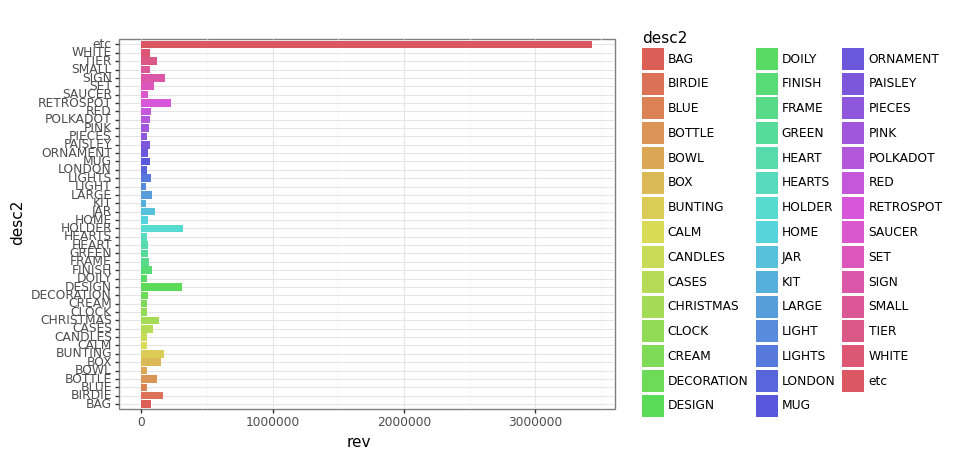

<ggplot: (8760925664597)>

In [58]:
(
    ggplot(cnt3, aes('desc2', 'rev', fill = 'desc2')) +
    gg.geom_col() +
    gg.theme_bw() + 
    gg.coord_flip()
)


# Iterator

In [60]:
mat = [list('ABC'), list('DEF'), list('GHI')]
a = {letters : [r, c] for r, rows in enumerate(mat) for c, letters in enumerate(rows)}
a

{'A': [0, 0],
 'B': [0, 1],
 'C': [0, 2],
 'D': [1, 0],
 'E': [1, 1],
 'F': [1, 2],
 'G': [2, 0],
 'H': [2, 1],
 'I': [2, 2]}

In [61]:
arr = np.empty([3,3], dtype = 'object')
arr

array([[None, None, None],
       [None, None, None],
       [None, None, None]], dtype=object)

In [76]:
for k, v in a.items() :
  arr[v[0],v[1]] = k
arr

array([['A', 'B', 'C'],
       ['D', 'E', 'F'],
       ['G', 'H', 'I']], dtype=object)

In [78]:
def add_title_with_name(title) :
  def add_title(func) :
    def wrapper(*args, **kwargs) :
      return title + '\n' + func(*args, **kwargs)
    return func
  return add_title

def calc_time(func) :
  def wrapper(*args, **kwargs) :
    s = datetime.now() 
    func(*args, **kwargs)
    e = datetime.now()
    print(e-s)
    return func(*args, **kwargs)
  return wrapper

@calc_time 
@add_title_with_name('kim')
def get_title(title) :
  return(title)

In [79]:
print(get_title('야후'))

0:00:00.000009
야후
